In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

In [2]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Knight, Mr. Robert J",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


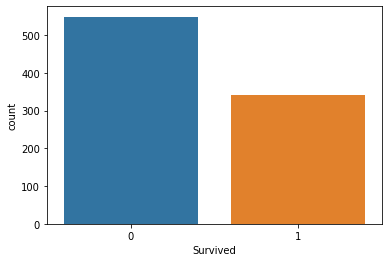

In [10]:
sns.countplot(x='Survived',data=df)
plt.show()

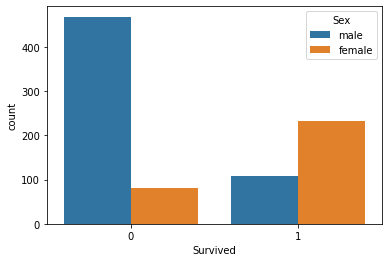

In [12]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

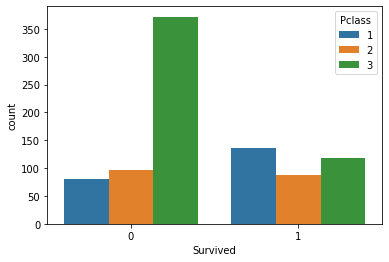

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.show()

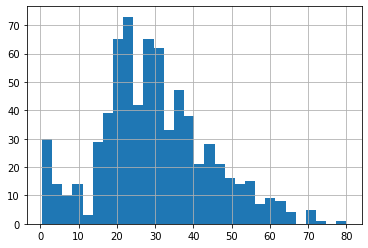

In [14]:
df.Age.hist(bins=30)
plt.show()

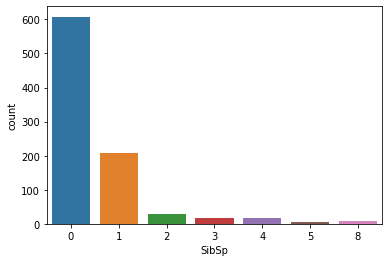

In [16]:
sns.countplot(x='SibSp',data=df)
plt.show()

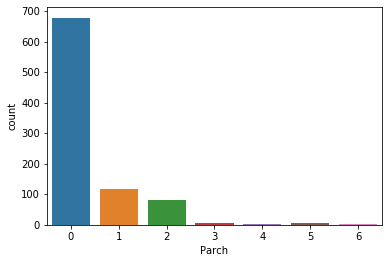

In [17]:
sns.countplot(x='Parch',data=df)
plt.show()

In [18]:
df = df.drop(['Cabin','Name'],axis=1)

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

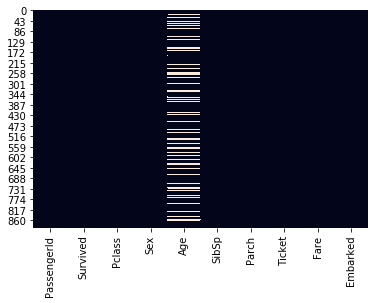

In [21]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

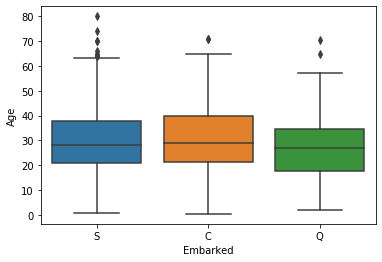

In [23]:
sns.boxplot(x= df.Embarked,y=df.Age)
plt.show()

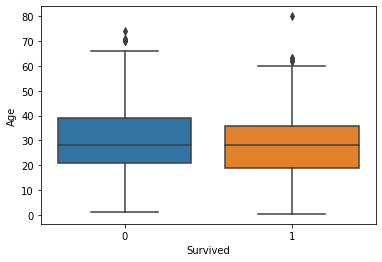

In [24]:
sns.boxplot(x= df.Survived,y=df.Age)
plt.show()

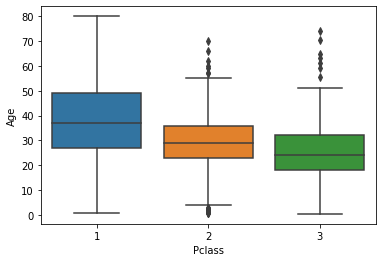

In [25]:
sns.boxplot(x= df.Pclass,y=df.Age)
plt.show()

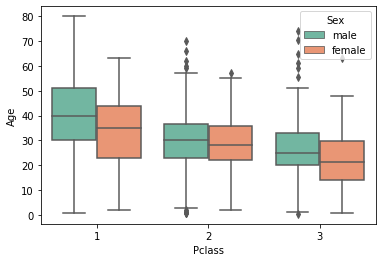

In [26]:
sns.boxplot(x= 'Pclass',y='Age', hue='Sex',data=df,palette='Set2')
plt.show()

In [39]:
for i in df['Pclass'].unique():
    for j in df['Sex'].unique():
        print("Average Age of " + str(j) + "s in Class " + str(i) + " is: ",np.round(np.mean(df[(df.Pclass == i) & (df.Sex == j)].Age)))             

Average Age of males in Class 3 is:  27.0
Average Age of females in Class 3 is:  22.0
Average Age of males in Class 1 is:  41.0
Average Age of females in Class 1 is:  35.0
Average Age of males in Class 2 is:  31.0
Average Age of females in Class 2 is:  29.0


In [40]:
for i in range(df.shape[0]):
    if np.isnan(df.Age[i]):
#        print(df.Age[i])
        df.Age[i] = np.round(np.mean(df[(df.Pclass == df.Pclass[i]) & (df.Sex == df.Sex[i])].Age))
#        print(df.Age[i])

C:\Users\karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [42]:
df1 = df.dropna()
df1.shape

(889, 10)

In [44]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [45]:
P_class = pd.get_dummies(df1.Pclass, drop_first = True)
Gender = pd.get_dummies(df1.Sex, drop_first = True)
Embark = pd.get_dummies(df1.Embarked, drop_first = True)
df2 = pd.concat([df1, P_class, Gender, Embark], axis = 1)
df2.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0


In [46]:
df3 = df2.drop(['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Embarked'], axis = 1)
df3.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [50]:
test_size = 0.3
seed = 10
X_train, X_test, y_train, y_test = train_test_split(df3.drop('Survived', axis=1), df3['Survived'], test_size = test_size, random_state = seed, stratify = df3['Survived'])

In [52]:
model = LogisticRegression(random_state = 10, class_weight='balanced', max_iter = 1000)
model.fit(X_train,y_train)

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
print('classes: ',model.classes_)
print('coefficients: ',model.coef_)
print('intercept :',model.intercept_)

classes:  [0 1]
coefficients:  [[-0.03120338 -0.32076952  0.1023912   0.00811919 -0.4641046  -1.62674815
  -2.35556098 -0.3154822  -0.28160327]]
intercept : [3.360024]


In [54]:
pred1 = model.predict(X_test)

In [55]:
labels = [1, 0]
con_mat1 = confusion_matrix(y_test, pred1, labels = labels )
print(con_mat1)

[[ 73  29]
 [ 37 128]]


In [56]:
pred = model.predict(X_test)
labels = [1, 0]
con_mat = confusion_matrix(y_test, pred, labels = labels )
print(con_mat)

[[ 73  29]
 [ 37 128]]


In [57]:
accuracy=(con_mat[0,0] + con_mat[1,1])/y_test.size
print(accuracy)
model.score(X_test, y_test)

0.7528089887640449


0.7528089887640449

In [58]:
model_1=LogisticRegression(class_weight = 'balanced')
model_1.fit(X_train,y_train)
model_1.score(X_test, y_test)

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7528089887640449

In [60]:
model_2=LogisticRegression(class_weight = {0:0.81, 1:1.31})
model_2.fit(X_train,y_train)
model_2.score(X_test, y_test)

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7528089887640449

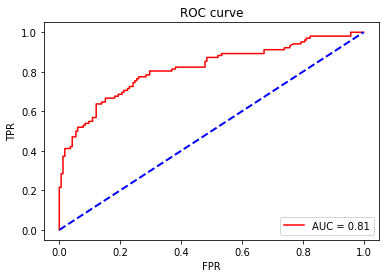

In [61]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs = model_2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [62]:
roc_auc_score(y_test, preds)

0.8149732620320855